In [1]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 1.2 MB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=48f985353fea94a5ab468dce1fe96031bce8faf9d7102a83fd0001e3b4d9315f
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [17]:
!mkdir unknown
!wget https://cdn.tgdd.vn/Files/2022/02/21/1416573/bill-gates_1280x720-800-resize.jpg -O unknown/1.jpg
!wget https://image.thanhnien.vn/w660/Uploaded/2022/xdrkxrvekx/2021_04_15/123_cdbn.jpg -O unknown/2.jpg

--2022-10-19 11:58:48--  https://cdn.tgdd.vn/Files/2022/02/21/1416573/bill-gates_1280x720-800-resize.jpg
Resolving cdn.tgdd.vn (cdn.tgdd.vn)... 103.48.78.149
Connecting to cdn.tgdd.vn (cdn.tgdd.vn)|103.48.78.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58589 (57K) [image/jpeg]
Saving to: ‘unknown/1.jpg’

unknown/1.jpg       100%[===================>]  57.22K   132KB/s    in 0.4s    

2022-10-19 11:58:50 (132 KB/s) - ‘unknown/1.jpg’ saved [58589/58589]

--2022-10-19 11:58:50--  https://image.thanhnien.vn/w660/Uploaded/2022/xdrkxrvekx/2021_04_15/123_cdbn.jpg
Resolving image.thanhnien.vn (image.thanhnien.vn)... 103.90.223.6
Connecting to image.thanhnien.vn (image.thanhnien.vn)|103.90.223.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51526 (50K) [image/jpeg]
Saving to: ‘unknown/2.jpg’

unknown/2.jpg       100%[===================>]  50.32K   184KB/s    in 0.3s    

2022-10-19 11:58:51 (184 KB/s) - ‘unknown/2.jpg’ saved [51526/5

In [25]:
!mkdir known
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/a/a0/Bill_Gates_2018.jpg/640px-Bill_Gates_2018.jpg -O known/bill1.jpg

mkdir: cannot create directory ‘known’: File exists
--2022-10-19 12:02:37--  https://upload.wikimedia.org/wikipedia/commons/thumb/a/a0/Bill_Gates_2018.jpg/640px-Bill_Gates_2018.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87981 (86K) [image/jpeg]
Saving to: ‘known/bill1.jpg’

known/bill1.jpg     100%[===================>]  85.92K  --.-KB/s    in 0.05s   

2022-10-19 12:02:37 (1.65 MB/s) - ‘known/bill1.jpg’ saved [87981/87981]



Processing 2.jpg
Not recognize!
Processing 1.jpg


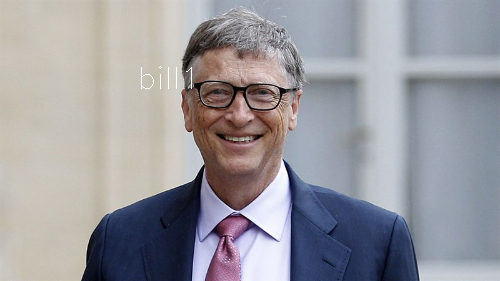

In [40]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

# resize all pic into 1 size
def read_img(path):
    img = cv2.imread(path)
    (h, w) = img.shape[:2]
    width = 500
    ratio = width / float(w)
    height = int(h * ratio)
    return cv2.resize(img, (width, height))

# store img_enc to compare
known_encodings = []
known_names = []
known_dir = 'known'

for file in os.listdir(known_dir):
    img = read_img(known_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]
    known_encodings.append(img_enc)
    known_names.append(file.split('.')[0])

unknown_dir = 'unknown'
for file in os.listdir(unknown_dir):
    print("Processing", file)
    img = read_img(unknown_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]

    results = face_recognition.compare_faces(known_encodings, img_enc)

    for i in range(len(results )):
      if results[i] == True:
        name = known_names[i]
        (top, right, bottom, left) = face_recognition.face_locations(img)[0]
        font = cv2.FONT_HERSHEY_SIMPLEX
        fontScale = 1
        color = (255, 2500, 255)
        cv2.putText(img, name,(left-50, top+20),font,fontScale,color)
        cv2_imshow(img)
      else:
        print('Not recognize!')